Ensemble Technique : Voting regressor

A Voting Regressor is an ensemble learning technique that combines the predictions of multiple base regression models to produce a more accurate and robust prediction. It's similar to a Voting Classifier, but instead of classifying data points into categories, it predicts numerical values.

How it Works:

Multiple Base Models: Several base regression models (e.g., Random Forest, Gradient Boosting, XGBoost) are trained on the same dataset.
Individual Predictions: Each base model makes its own prediction for a given data point.
Averaging Predictions: The predictions from all base models are averaged to obtain a final prediction.
Types of Voting:

Simple Averaging: The predictions from all base models are averaged equally.

Weighted Averaging: Different weights are assigned to each base model based on their performance or reliability.

Advantages of Voting Regressors:

Improved Accuracy: By combining multiple models, voting regressors can often achieve higher accuracy than individual models.

Reduced Overfitting: Ensembles can reduce overfitting by averaging out the noise in individual models.

Increased Robustness: Ensembles are less sensitive to noise and outliers in the data.

Better Generalization: Ensembles can generalize better to unseen data.

How the Notebook is organized ?
  
Section 1 : Generalized part

Section 2 : Voting regressor ( Simple Average ) with 3 optimized base models ( random forest , gradient boost , extreme gradient boost )

Section 3 : Voting regressor  (Weighted Average) with 3 optimized base models ( random forest , gradient boost , extreme gradient boost )

# Section 1 : Generatized part

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , r2_score

from sklearn.ensemble import VotingRegressor

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')

# a. Load Dataset

In [6]:
house = pd.read_csv('kc_house_data.csv')

In [7]:
house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [9]:
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
house.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


# b. Exploratory data analysis

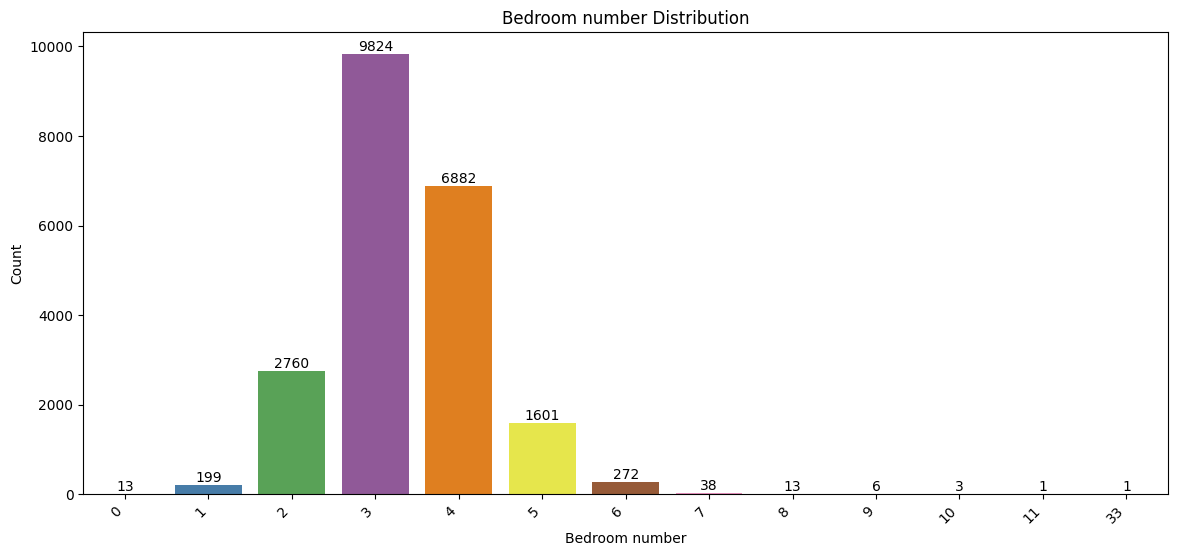

In [16]:
plt.figure(figsize=(14, 6))
sns.barplot(house.bedrooms.value_counts() , palette = 'Set1');

# Show bar values on top of the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, int(height), ha='center', va='bottom')  # Adjust vertical offset (0.1) as needed

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Bedroom number Distribution')
plt.xlabel('Bedroom number')
plt.ylabel('Count')
plt.show()

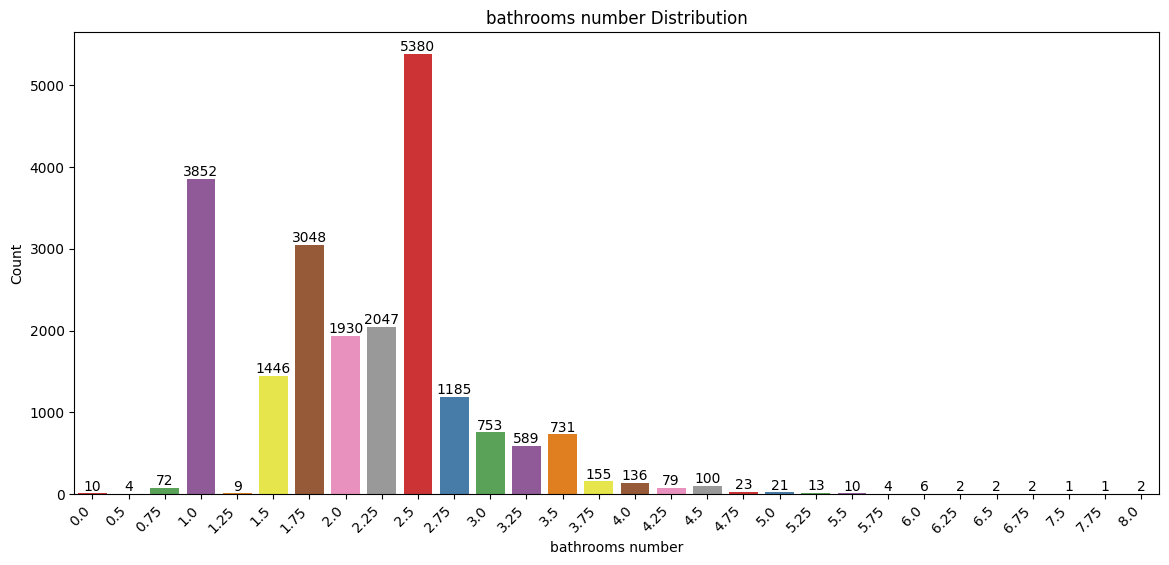

In [17]:
plt.figure(figsize=(14, 6))
sns.barplot(house.bathrooms.value_counts() , palette = 'Set1');

# Show bar values on top of the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, int(height), ha='center', va='bottom')  # Adjust vertical offset (0.1) as needed

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('bathrooms number Distribution')
plt.xlabel('bathrooms number')
plt.ylabel('Count')
plt.show()

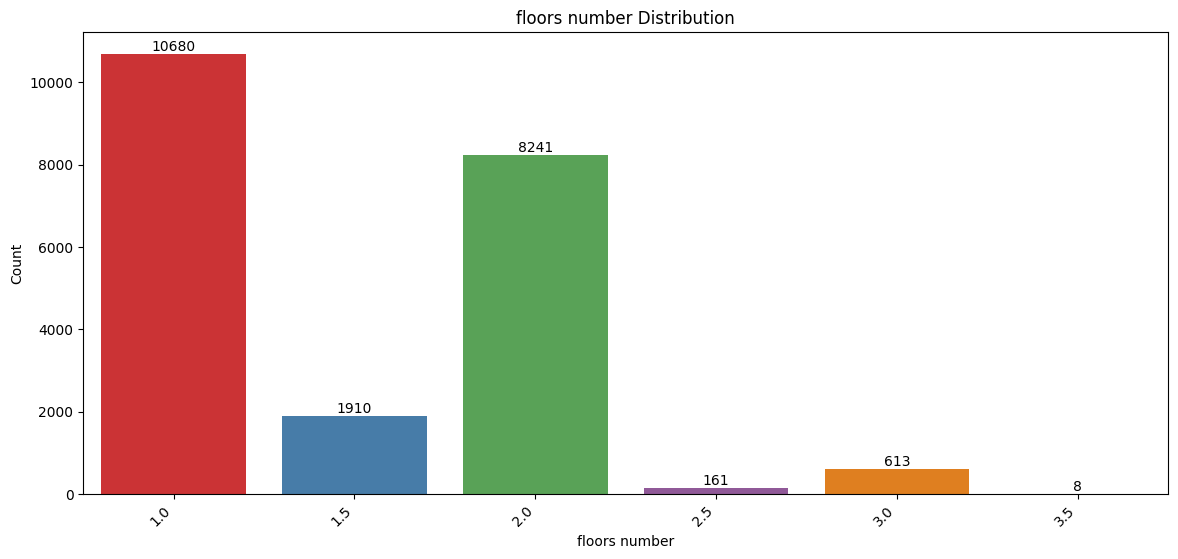

In [21]:
plt.figure(figsize=(14, 6))
sns.barplot(house.floors.value_counts() , palette = 'Set1');

# Show bar values on top of the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, int(height), ha='center', va='bottom')  # Adjust vertical offset (0.1) as needed

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('floors number Distribution')
plt.xlabel('floors number')
plt.ylabel('Count')
plt.show()

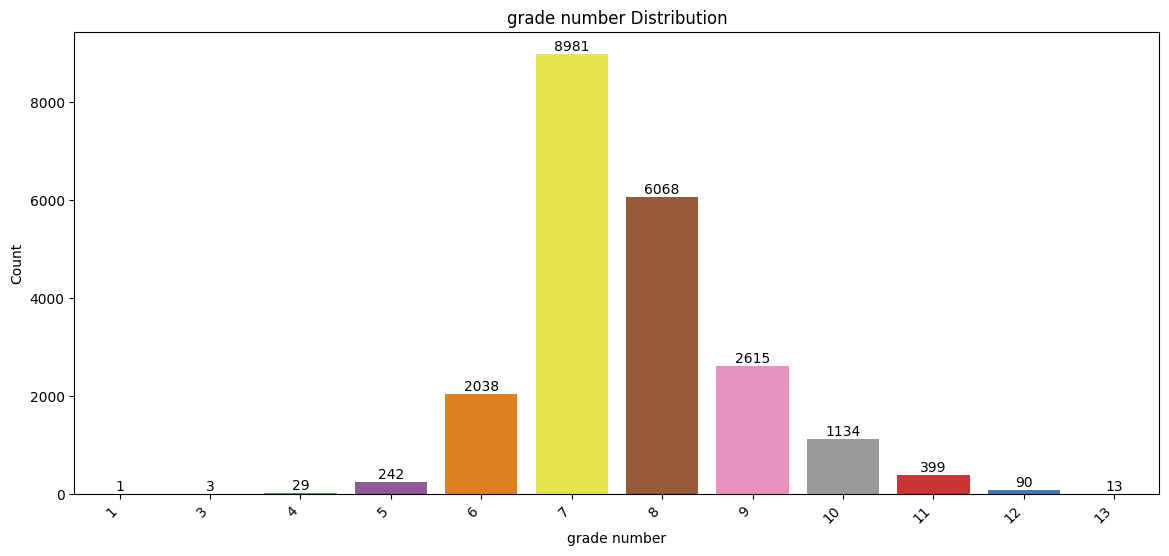

In [28]:
plt.figure(figsize=(14, 6))
sns.barplot(house.grade.value_counts() , palette = 'Set1');

# Show bar values on top of the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, int(height), ha='center', va='bottom')  # Adjust vertical offset (0.1) as needed

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('grade number Distribution')
plt.xlabel('grade number')
plt.ylabel('Count')
plt.show()

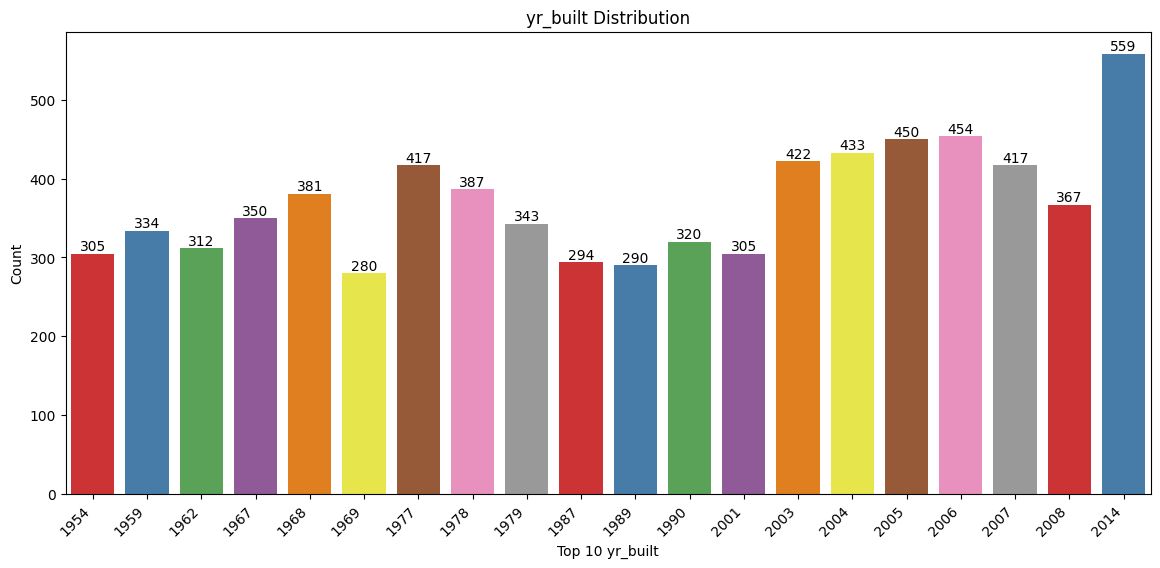

In [33]:
plt.figure(figsize=(14, 6))
sns.barplot(house.yr_built.value_counts().head(20) , palette = 'Set1');

# Show bar values on top of the bars
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, int(height), ha='center', va='bottom')  # Adjust vertical offset (0.1) as needed

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('yr_built Distribution')
plt.xlabel('Top 10 yr_built')
plt.ylabel('Count')
plt.show()

In [12]:
house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [39]:
# As id and date columns are not important to predict price so we are discarding it for finding correlation

features = house.iloc[:,3:].columns.tolist()
target = house.iloc[:,2].name

In [40]:
# Finding Correlation of price with other variables to see how many variables are strongly correlated with price
from scipy.stats import pearsonr

correlations = {}
for f in features:
    data_temp = house[[f,target]]
    x1 = data_temp[f].values
    x2 = data_temp[target].values
    key = f + ' vs ' + target
    correlations[key] = pearsonr(x1,x2)[0]

In [41]:
# Printing all the correlated features value with respect to price which is target variable
# Checking Corelation with price

data_correlations = pd.DataFrame(correlations, index=['Value']).T
data_correlations.loc[data_correlations['Value'].abs().sort_values(ascending=False).index]

,Value
sqft_living vs price,0.702035
grade vs price,0.667434
sqft_above vs price,0.605567
sqft_living15 vs price,0.585379
bathrooms vs price,0.525138
view vs price,0.397293
sqft_basement vs price,0.323816
bedrooms vs price,0.308350
lat vs price,0.307003
waterfront vs price,0.266369


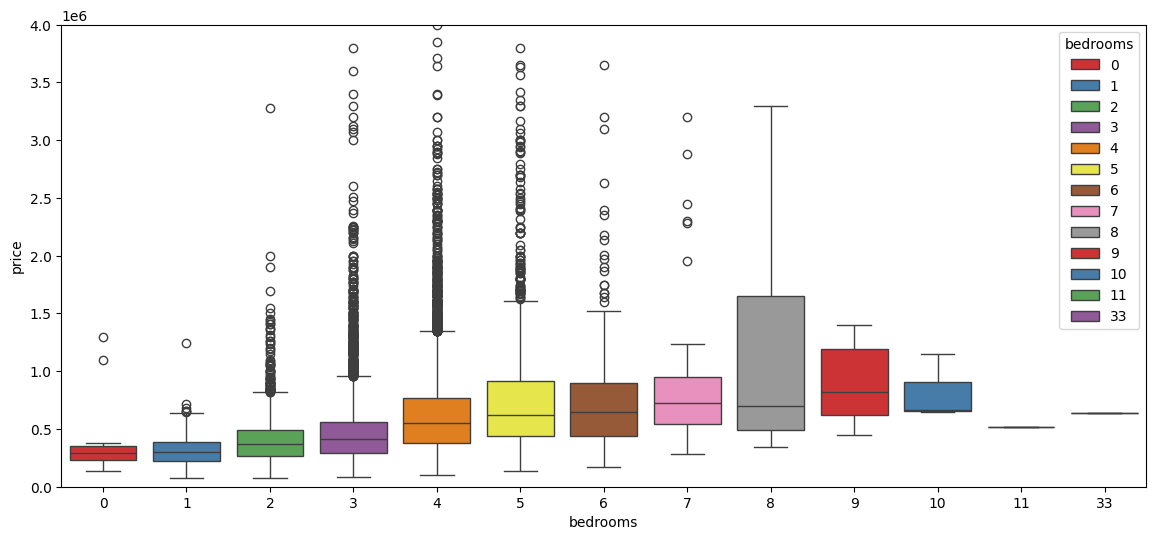

In [46]:
var = 'bedrooms'
data = pd.concat([house['price'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data , palette = 'Set1' , hue='bedrooms')
fig.axis(ymin=0, ymax=4000000);

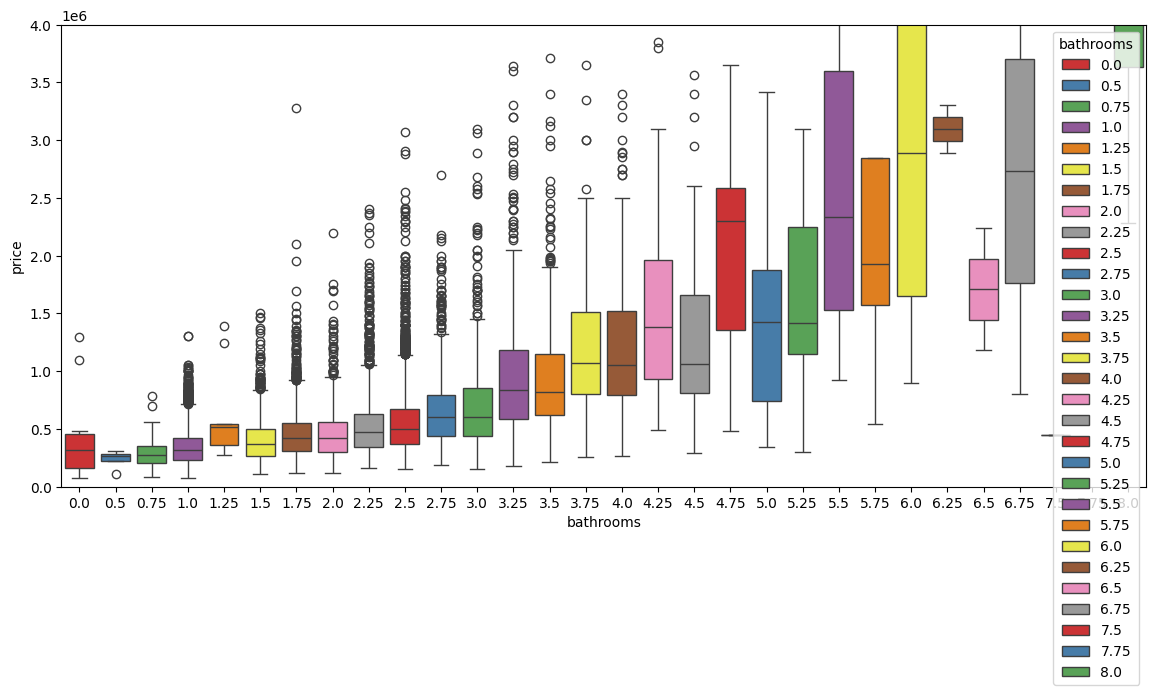

In [48]:
var = 'bathrooms'
data = pd.concat([house['price'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data , palette = 'Set1' , hue='bathrooms')
fig.axis(ymin=0, ymax=4000000);

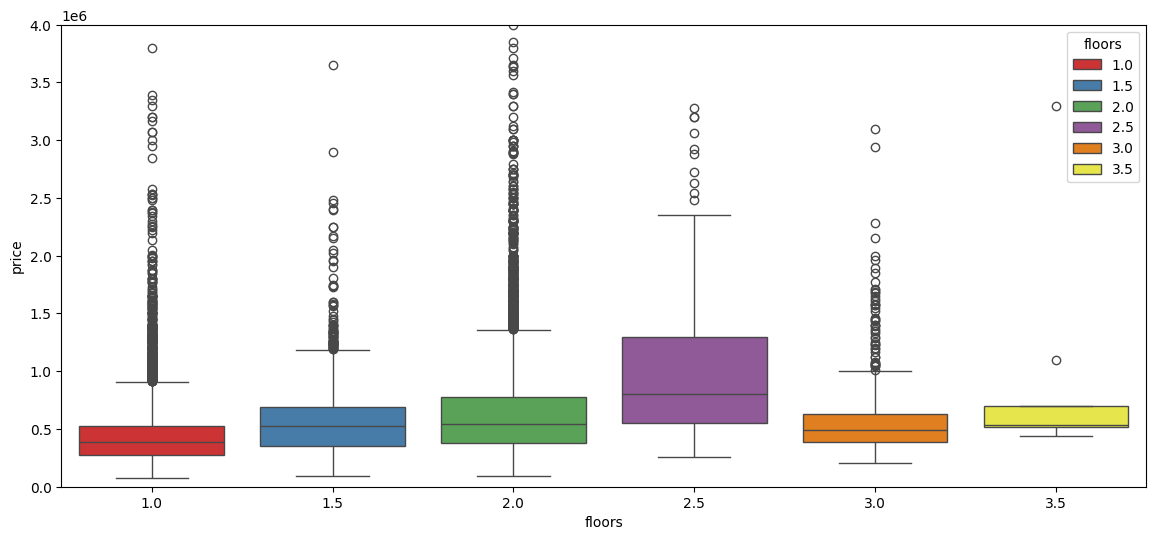

In [50]:
var = 'floors'
data = pd.concat([house['price'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data , palette = 'Set1' , hue='floors')
fig.axis(ymin=0, ymax=4000000);

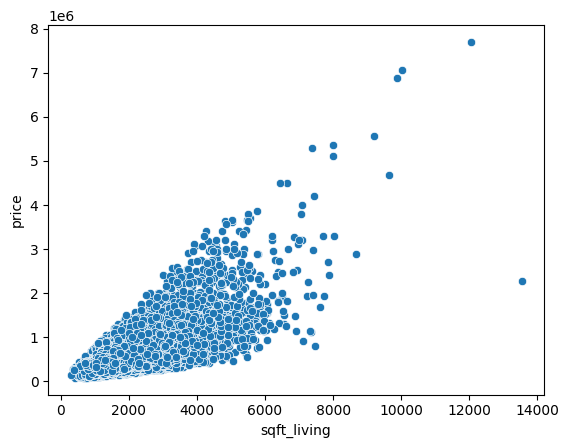

In [49]:
sns.scatterplot(x='sqft_living', y='price', data=house, palette = 'Set1');

# c. Splitting the data

In [54]:
# Considering a subset of variables

X = house[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms','long']]
y = house[['price']]

In [55]:
X.head()

,sqft_living,grade,sqft_above,sqft_living15,bathrooms,view,sqft_basement,waterfront,yr_built,lat,bedrooms,long
0,1180,7,1180,1340,1.00,0,0,0,1955,47.5112,3,-122.257
1,2570,7,2170,1690,2.25,0,400,0,1951,47.7210,3,-122.319
2,770,6,770,2720,1.00,0,0,0,1933,47.7379,2,-122.233
3,1960,7,1050,1360,3.00,0,910,0,1965,47.5208,4,-122.393
4,1680,8,1680,1800,2.00,0,0,0,1987,47.6168,3,-122.045


In [58]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [60]:
X_train.shape , X_test.shape

((17290, 12), (4323, 12))

# Section 2 : Voting regressor ( Simple Average ) with 3 optimized base models ( random forest , gradient boost , extreme gradient boost )

Imagine you have a dataset of house prices and you want to predict the price of a new house. You train three models:

Random Forest: A powerful ensemble method that creates multiple decision trees.

Gradient Boosting: An ensemble method that builds models sequentially, each correcting the errors of the previous ones.

XGBoost: An optimized version of gradient boosting, known for its efficiency and accuracy.

Each model makes a prediction for the price of the new house:

Random Forest: Predicts $300,000

Gradient Boosting: Predicts $320,000

XGBoost: Predicts $310,000

The Voting Regressor averages these predictions:

Average Prediction = (300,000 + 320,000 + 310,000) / 3 = $310,000

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import VotingRegressor

a. Model 1 : Random Forest Regressor

In [62]:
# Hyperparameter Tuning for Random Forest

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [63]:
rf_model = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)

In [64]:
rf_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [65]:
rf_model.best_params_ , rf_model.best_score_

({'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300},
 0.8739079259535358)

b. Model 2 : Gradient boost regressor

In [66]:
# Hyperparameter Tuning for Gradient Boosting

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

In [67]:
gb_model = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5)

In [68]:
gb_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

In [69]:
gb_model.best_params_ , gb_model.best_score_

({'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300},
 0.8825656742630057)

c. Model 3 : extreme gradient boost regressor

In [70]:
# Hyperparameter Tuning for XGBoost

param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300]
}

In [71]:
xgb_model = GridSearchCV(XGBRegressor(), param_grid_xgb, cv=5)

In [73]:
%%time
xgb_model.fit(X_train, y_train)

CPU times: user 2min 37s, sys: 945 ms, total: 2min 38s
Wall time: 1min 31s


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...ne,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]})

d. Voting regressor ( Simple average )

In [74]:
# Create the voting regressor

voting_reg = VotingRegressor(estimators=[('rf', rf_model.best_estimator_),
                                         ('gb', gb_model.best_estimator_),
                                         ('xgb', xgb_model.best_estimator_)])

In [75]:
# Train the voting regressor

voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(n_estimators=300)),
                            ('gb',
                             GradientBoostingRegressor(max_depth=5,
                                                       n_estimators=300)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None,...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...))])

In [76]:
# Make predictions on the test set

y_pred = voting_reg.predict(X_test)

In [78]:
r2_score = r2_score(y_test, y_pred)
print("R-squared Score:", r2_score)


R-squared Score: 0.8808842078375885


# Section 3 : Voting regressor ( Weighted Average ) with 3 optimized base models ( random forest , gradient boost , extreme gradient boost )



In [83]:
# Define weights for each model (replace with your desired weights)

weights = [0.25, 0.25, 0.5]

In [85]:
# Create the voting regressor with weights

voting_reg = VotingRegressor(estimators=[('rf', rf_model.best_estimator_),
                                         ('gb', gb_model.best_estimator_),
                                         ('xgb', xgb_model.best_estimator_)],
                               weights=weights)

In [86]:
# Train the voting regressor

voting_reg.fit(X_train, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(n_estimators=300)),
                            ('gb',
                             GradientBoostingRegressor(max_depth=5,
                                                       n_estimators=300)),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None,...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=5,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=300,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...))],
                weights=[0.25, 0.25, 0.5])

In [87]:
# Make predictions on the test set

y_pred = voting_reg.predict(X_test)

In [90]:
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)  # Assign the result to a different variable, like 'r2'

# Print the R-squared score
print("R-squared Score:", r2)

R-squared Score: 0.8814820879780418
